In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from termcolor import colored as cl # text customization
import numpy as np # working with arrays

In [82]:
data = pd.read_csv('ThiTHPT2018.csv', low_memory=False)
data

,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,Unnamed: 10,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh,Ten Tinh,Vung mien
0,1,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,NaN,13.25,9.75,NaN,18,Bac Giang,Mien Bac
1,2,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,NaN,22.50,25.3,NaN,18,Bac Giang,Mien Bac
2,3,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,NaN,17.25,16.50,NaN,15.5,15.75,18,Bac Giang,Mien Bac
3,4,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,NaN,14.00,11.75,NaN,18,Bac Giang,Mien Bac
4,5,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,NaN,16.50,13.55,NaN,18,Bac Giang,Mien Bac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744391,744392,4.6,4.50,6.0,3.75,3.00,3.25,NaN,NaN,NaN,NaN,11.35,10.85,NaN,15.1,14.35,52,Ba Ria Vung Tau,Mien Nam
744392,744393,7.0,6.00,5.0,5.25,5.50,4.00,NaN,NaN,NaN,NaN,17.75,16.50,NaN,18,17.25,52,Ba Ria Vung Tau,Mien Nam
744393,744394,5.2,3.50,4.0,6.25,5.50,2.25,NaN,NaN,NaN,NaN,16.95,12.95,NaN,12.7,15.45,52,Ba Ria Vung Tau,Mien Nam
744394,744395,7.8,4.50,5.4,7.50,6.25,3.00,NaN,NaN,NaN,NaN,21.55,17.05,NaN,17.7,20.70,52,Ba Ria Vung Tau,Mien Nam


In [83]:
data = data.drop(['Unnamed: 10'], axis=1)
print(data.columns.to_list())

['SoBD', 'Toan', 'Van', 'Anh', 'Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD', 'KhoiA', 'KhoiB', 'KhoiC', 'KhoiD', 'KhoiA1', 'Ma Tinh', 'Ten Tinh', 'Vung mien']


In [84]:
data

,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh,Ten Tinh,Vung mien
0,1,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN,18,Bac Giang,Mien Bac
1,2,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.3,NaN,18,Bac Giang,Mien Bac
2,3,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,17.25,16.50,NaN,15.5,15.75,18,Bac Giang,Mien Bac
3,4,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN,18,Bac Giang,Mien Bac
4,5,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN,18,Bac Giang,Mien Bac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744391,744392,4.6,4.50,6.0,3.75,3.00,3.25,NaN,NaN,NaN,11.35,10.85,NaN,15.1,14.35,52,Ba Ria Vung Tau,Mien Nam
744392,744393,7.0,6.00,5.0,5.25,5.50,4.00,NaN,NaN,NaN,17.75,16.50,NaN,18,17.25,52,Ba Ria Vung Tau,Mien Nam
744393,744394,5.2,3.50,4.0,6.25,5.50,2.25,NaN,NaN,NaN,16.95,12.95,NaN,12.7,15.45,52,Ba Ria Vung Tau,Mien Nam
744394,744395,7.8,4.50,5.4,7.50,6.25,3.00,NaN,NaN,NaN,21.55,17.05,NaN,17.7,20.70,52,Ba Ria Vung Tau,Mien Nam


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744396 entries, 0 to 744395
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SoBD       744396 non-null  int64  
 1   Toan       741024 non-null  float64
 2   Van        728309 non-null  float64
 3   Anh        659998 non-null  float64
 4   Ly         323353 non-null  float64
 5   Hoa        326981 non-null  float64
 6   Sinh       319605 non-null  float64
 7   Su         446118 non-null  float64
 8   Dia        433221 non-null  float64
 9   GDCD       379034 non-null  float64
 10  KhoiA      321232 non-null  float64
 11  KhoiB      319516 non-null  float64
 12  KhoiC      432605 non-null  float64
 13  KhoiD      656353 non-null  object 
 14  KhoiA1     307864 non-null  float64
 15  Ma Tinh    744396 non-null  int64  
 16  Ten Tinh   744396 non-null  object 
 17  Vung mien  744396 non-null  object 
dtypes: float64(13), int64(2), object(3)
memory usage: 102.2+ MB


In [86]:
data.describe()

,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiA1,Ma Tinh
count,744396.000000,741024.000000,728309.000000,659998.000000,323353.000000,326981.000000,319605.000000,446118.000000,433221.000000,379034.000000,321232.000000,319516.000000,432605.000000,307864.000000,744396.000000
mean,372198.500000,4.884162,5.443449,3.933543,4.961179,4.864391,4.561249,3.805371,5.483495,7.157468,15.523625,15.124206,14.622717,15.042056,30.321701
std,214888.759829,1.440636,1.447770,1.567942,1.531097,1.523851,1.244402,1.241262,1.257440,1.233368,3.633543,3.211462,3.238440,3.462336,19.057832
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,186099.750000,3.800000,4.500000,2.800000,3.750000,3.750000,3.750000,3.000000,4.750000,6.500000,13.100000,13.000000,12.500000,12.700000,15.000000
50%,372198.500000,5.000000,5.500000,3.600000,5.000000,4.750000,4.500000,3.750000,5.500000,7.250000,15.650000,15.150000,14.500000,14.900000,32.000000
75%,558297.250000,6.000000,6.500000,4.600000,6.000000,6.000000,5.250000,4.500000,6.250000,8.000000,18.000000,17.200000,16.750000,17.300000,47.000000
max,744396.000000,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,29.050000,29.550000,28.500000,28.950000,64.000000


In [87]:
data.isna().sum()

SoBD              0
Toan           3372
Van           16087
Anh           84398
Ly           421043
Hoa          417415
Sinh         424791
Su           298278
Dia          311175
GDCD         365362
KhoiA        423164
KhoiB        424880
KhoiC        311791
KhoiD         88043
KhoiA1       436532
Ma Tinh           0
Ten Tinh          0
Vung mien         0
dtype: int64

In [88]:
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744396 entries, 0 to 744395
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SoBD       744396 non-null  int64  
 1   Toan       744396 non-null  float64
 2   Van        744396 non-null  float64
 3   Anh        744396 non-null  float64
 4   Ly         744396 non-null  float64
 5   Hoa        744396 non-null  float64
 6   Sinh       744396 non-null  float64
 7   Su         744396 non-null  float64
 8   Dia        744396 non-null  float64
 9   GDCD       744396 non-null  float64
 10  KhoiA      744396 non-null  float64
 11  KhoiB      744396 non-null  float64
 12  KhoiC      744396 non-null  float64
 13  KhoiD      744396 non-null  object 
 14  KhoiA1     744396 non-null  float64
 15  Ma Tinh    744396 non-null  int64  
 16  Ten Tinh   744396 non-null  object 
 17  Vung mien  744396 non-null  object 
dtypes: float64(13), int64(2), object(3)
memory usage: 102.2+ MB


In [91]:
df_scores_A = data.loc[:, ['Toan', 'Ly', 'Hoa','KhoiA']].values

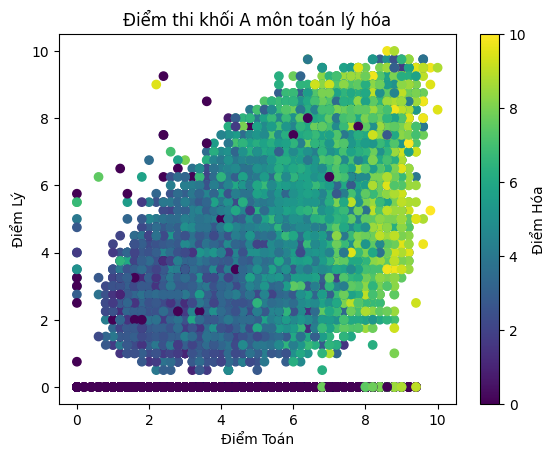

In [92]:
# Vẽ biểu đồ scatter plot
plt.scatter(df_scores_A[:, 0], df_scores_A[:, 1], c=df_scores_A[:, 2])
plt.xlabel('Điểm Toán')
plt.ylabel('Điểm Lý')
cbar = plt.colorbar()
cbar.set_label('Điểm Hóa')
plt.title('Điểm thi khối A môn toán lý hóa')
plt.show()

In [76]:
X = df_scores_A
X = np.nan_to_num(df_scores_A)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])
data


Cluster data samples :  [[-1.26298694 -0.81074006 -0.81650049 -0.8320996 ]
 [ 2.67104901 -0.81074006 -0.81650049 -0.8320996 ]
 [ 0.77185925  1.35243539  1.28520636  1.31057634]
 [-0.99167411 -0.81074006 -0.81650049 -0.8320996 ]
 [-0.72036129 -0.81074006 -0.81650049 -0.8320996 ]]


,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh,Ten Tinh,Vung mien,cluster_num
0,1,3.0,3.75,3.0,0.00,0.00,0.00,3.0,6.50,8.25,0.00,0.00,13.25,9.75,0.00,18,Bac Giang,Mien Bac,0
1,2,8.8,7.50,9.0,0.00,0.00,0.00,6.0,9.00,8.25,0.00,0.00,22.50,25.3,0.00,18,Bac Giang,Mien Bac,0
2,3,6.0,5.50,4.0,5.75,5.50,5.00,0.0,0.00,0.00,17.25,16.50,0.00,15.5,15.75,18,Bac Giang,Mien Bac,1
3,4,3.4,5.75,2.6,0.00,0.00,0.00,3.5,4.75,7.25,0.00,0.00,14.00,11.75,0.00,18,Bac Giang,Mien Bac,0
4,5,3.8,6.75,3.0,0.00,0.00,0.00,3.5,6.25,8.00,0.00,0.00,16.50,13.55,0.00,18,Bac Giang,Mien Bac,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744391,744392,4.6,4.50,6.0,3.75,3.00,3.25,0.0,0.00,0.00,11.35,10.85,0.00,15.1,14.35,52,Ba Ria Vung Tau,Mien Nam,2
744392,744393,7.0,6.00,5.0,5.25,5.50,4.00,0.0,0.00,0.00,17.75,16.50,0.00,18,17.25,52,Ba Ria Vung Tau,Mien Nam,1
744393,744394,5.2,3.50,4.0,6.25,5.50,2.25,0.0,0.00,0.00,16.95,12.95,0.00,12.7,15.45,52,Ba Ria Vung Tau,Mien Nam,1
744394,744395,7.8,4.50,5.4,7.50,6.25,3.00,0.0,0.00,0.00,21.55,17.05,0.00,17.7,20.70,52,Ba Ria Vung Tau,Mien Nam,1


In [77]:
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))


[1 1 2 1 1 0 1 1 0 2 1 0 0 1 1 1 2 1 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 1 1 2
 1 2 1 1 0 2 2 2 2 2 2 2 0 2 0 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1]


In [94]:
X = np.insert(X, 4, values = labels, axis=1)
X

array([[ 3.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 8.8 ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 6.  ,  5.75,  5.5 , 17.25,  2.  ],
       ...,
       [ 5.2 ,  6.25,  5.5 , 16.95,  2.  ],
       [ 7.8 ,  7.5 ,  6.25, 21.55,  2.  ],
       [ 5.8 ,  6.25,  4.75, 16.8 ,  2.  ]])

In [98]:
dt_A = pd.DataFrame(X, columns= ['Toan','Ly','Hoa','KhoiA','num_cluster'])
dt_A

,Toan,Ly,Hoa,KhoiA,num_cluster
0,3.0,0.00,0.00,0.00,1.0
1,8.8,0.00,0.00,0.00,1.0
2,6.0,5.75,5.50,17.25,2.0
3,3.4,0.00,0.00,0.00,1.0
4,3.8,0.00,0.00,0.00,1.0
...,...,...,...,...,...
744391,4.6,3.75,3.00,11.35,0.0
744392,7.0,5.25,5.50,17.75,2.0
744393,5.2,6.25,5.50,16.95,2.0
744394,7.8,7.50,6.25,21.55,2.0


In [105]:
print(cl(dt_A.groupby('num_cluster').mean(), attrs = ['bold']))

                 Toan        Ly       Hoa      KhoiA
num_cluster                                         
0.0          4.861573  3.867957  3.784040  12.513569
1.0          4.221559  0.025780  0.071470   0.011104
2.0          6.468648  5.965489  5.845146  18.279283


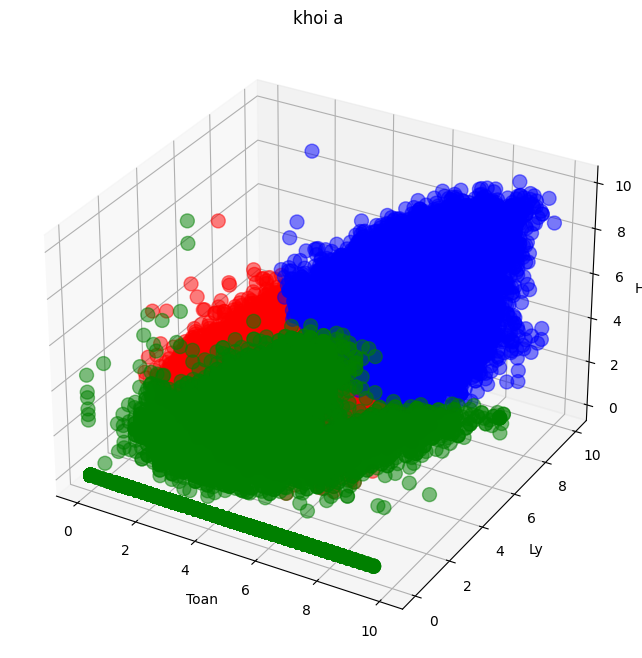

In [104]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Ly")
ax.set_zlabel("Hoa")
ax.set_title("khoi a")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
    clustered_data = dt_A[dt_A['num_cluster'] == i]
    ax.scatter(clustered_data['Toan'], clustered_data['Ly'], clustered_data['Hoa'], c=c, s=100, alpha=0.5)

plt.show()

In [ ]:
#cac khoi con lại như nhau